In [1]:
%matplotlib inline
import pylab as plt
from matusplotlib import loadStanFit
import numpy as np
from scipy.stats import ttest_1samp
from AnalyzeCalib import getCMsingle, selCPalgo,cmPredict

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Accuracy

In [23]:
suf='MGsp10'
suf='NMG'
et='tob'
gz=np.load(f'data/gz7m{suf}{et}.npy')
acc=-np.ones((gz.shape[3],gz.shape[0],gz.shape[4],3))
for a in range(acc.shape[3]):
    gz=np.load(f'data/gz{[4,7,10][a]}m{suf}{et}.npy')
    for m in range(acc.shape[2]):
        for h in range(acc.shape[1]):
            for k in range(acc.shape[0]):
                acc[k,h,m,a]=np.nanmedian(np.nanmean(np.linalg.norm(gz[h,:,:,k,m,:],axis=2),axis=1),0)

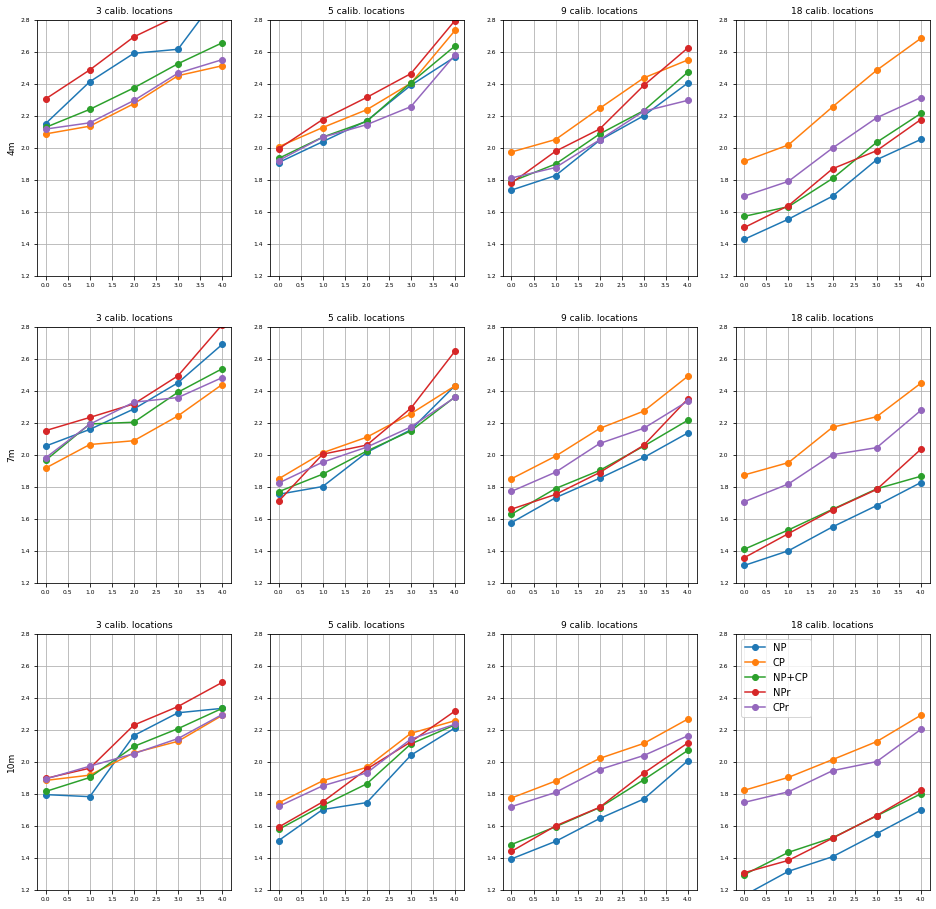

In [5]:
plt.figure(figsize=(16,16))
for a in range(acc.shape[3]):
    #fig=plt.figure(figsize=(16,16))
    for h in range(acc.shape[1]):
        plt.subplot(3,4,a*4+h+1)
        d=np.float32(acc[:,h,:,a].T)
        plt.plot(d,'o-')
        plt.title(f'{[3,5,9,18][h]} calib. locations')
        plt.grid()
        #plt.xlim([.2,2.1]);
        if h==0: plt.ylabel(f'{[4,7,10][a]}m')
        plt.ylim([1.2,2.8])
plt.legend(['NP','CP','NP+CP','NPr','CPr']);

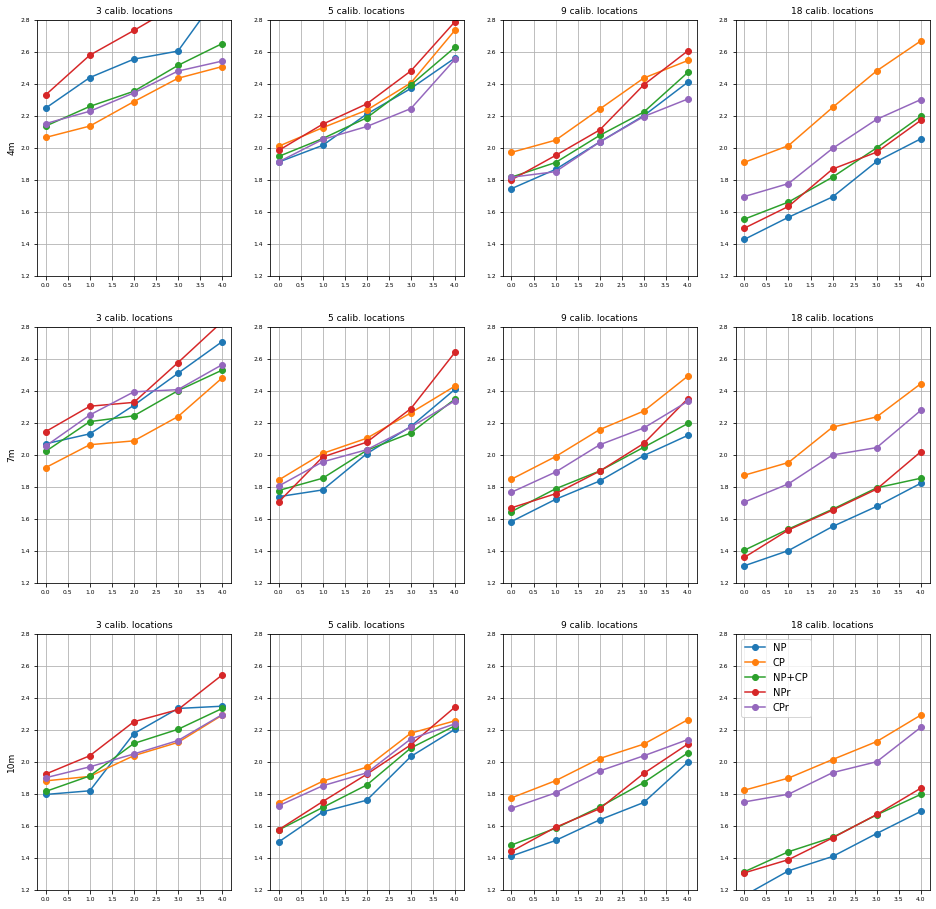

In [24]:
plt.figure(figsize=(16,16))
for a in range(acc.shape[3]):
    #fig=plt.figure(figsize=(16,16))
    for h in range(acc.shape[1]):
        plt.subplot(3,4,a*4+h+1)
        d=np.float32(acc[:,h,:,a].T)
        plt.plot(d,'o-')
        plt.title(f'{[3,5,9,18][h]} calib. locations')
        plt.grid()
        #plt.xlim([.2,2.1]);
        if h==0: plt.ylabel(f'{[4,7,10][a]}m')
        plt.ylim([1.2,2.8])
plt.legend(['NP','CP','NP+CP','NPr','CPr']);

# Power t-test

0.69772
0.356205
0.24997
0.226055


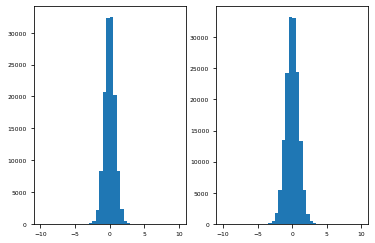

In [138]:
gz=np.load('data/gz7mNMG.npy')
for i in range(4):print(np.isnan(gz[i,:,:,0,0]).mean())
plt.subplot(1,2,1);i=1
plt.hist(gz[i,:,:,0,0][~np.isnan(gz[i,:,:,0,0])],bins=np.linspace(-10,10,41));
plt.subplot(1,2,2)
plt.hist(gz[i,:,:,1,0][~np.isnan(gz[i,:,:,1,0])],bins=np.linspace(-10,10,41));

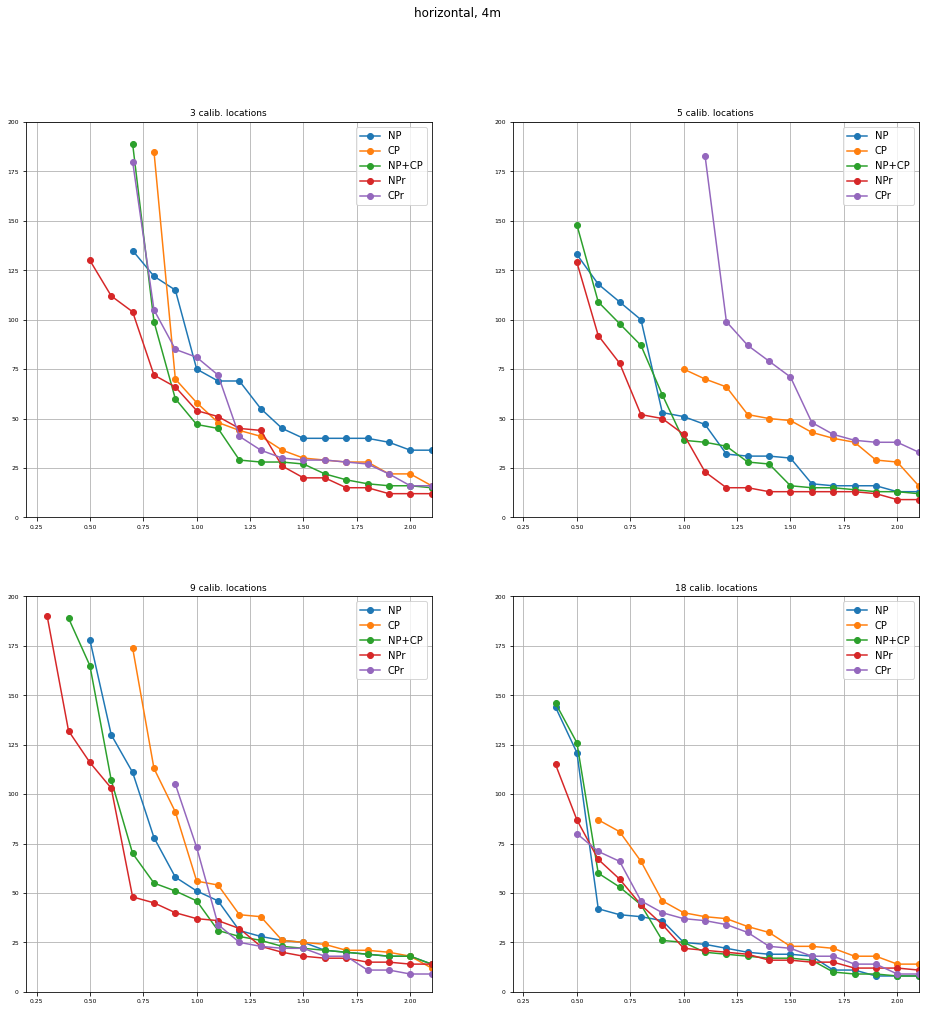

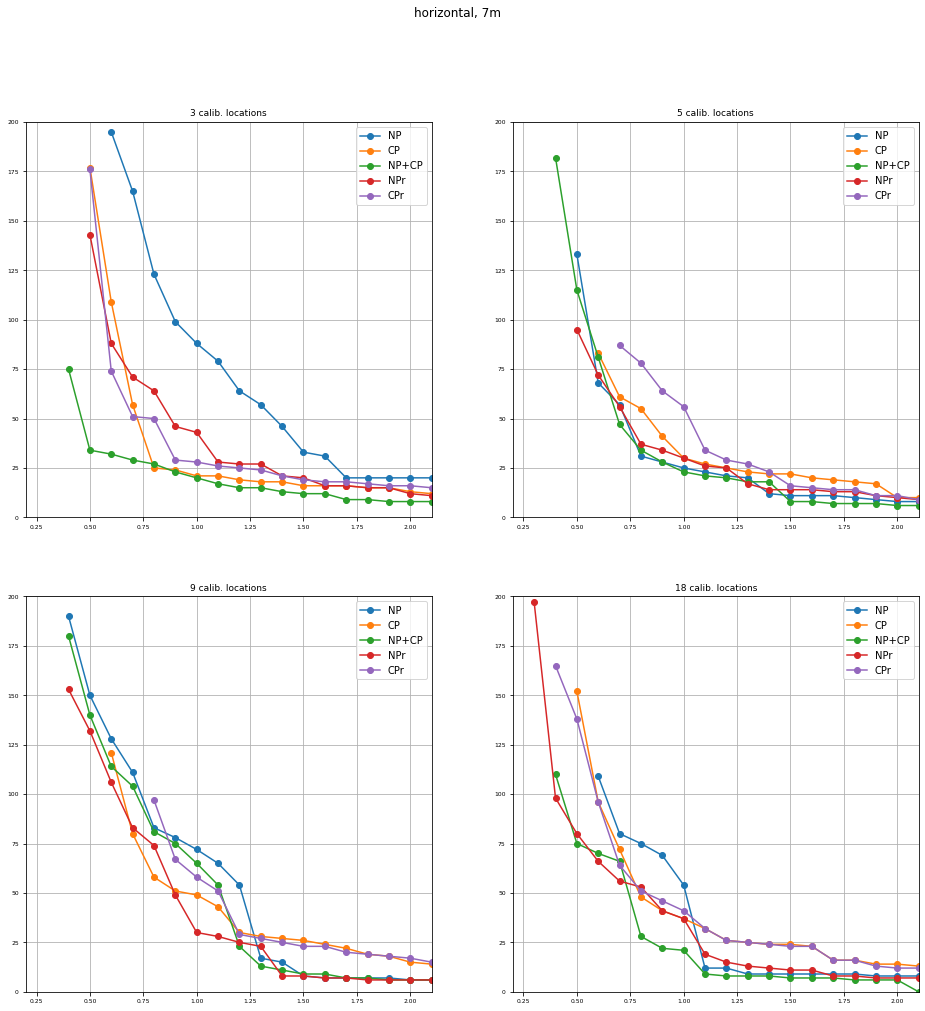

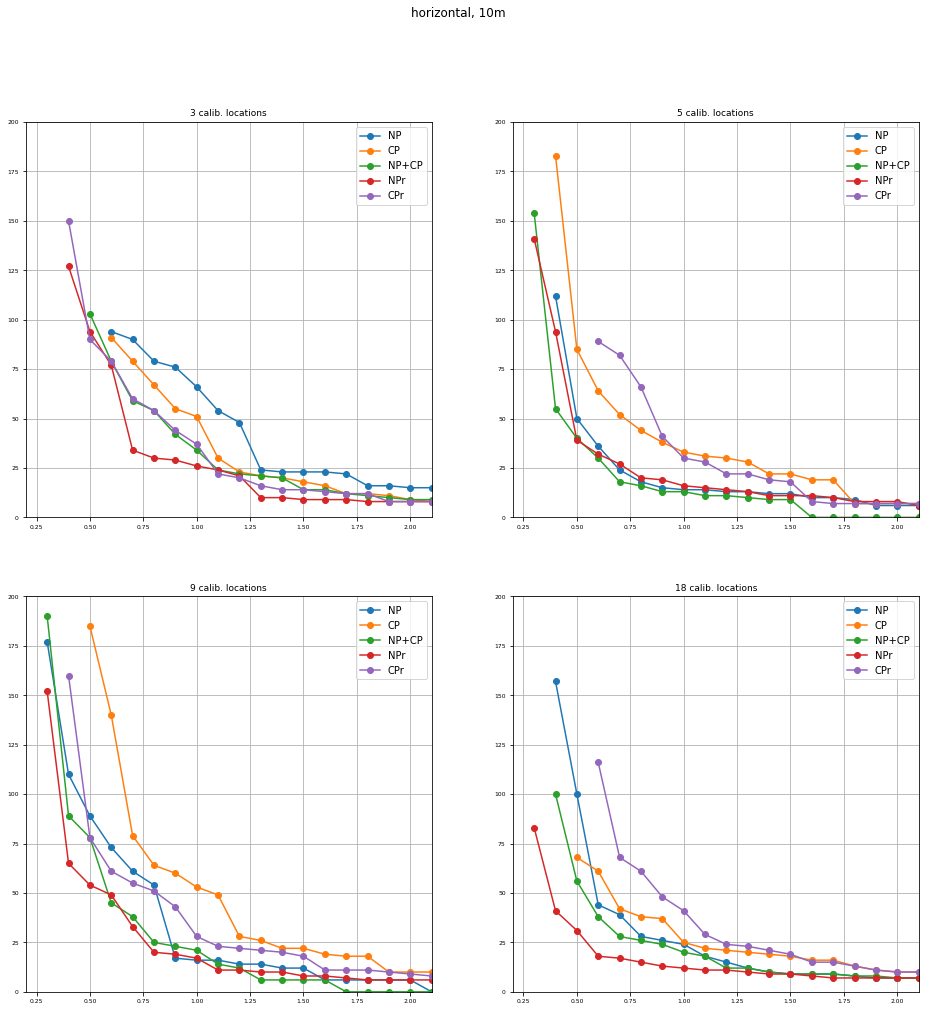

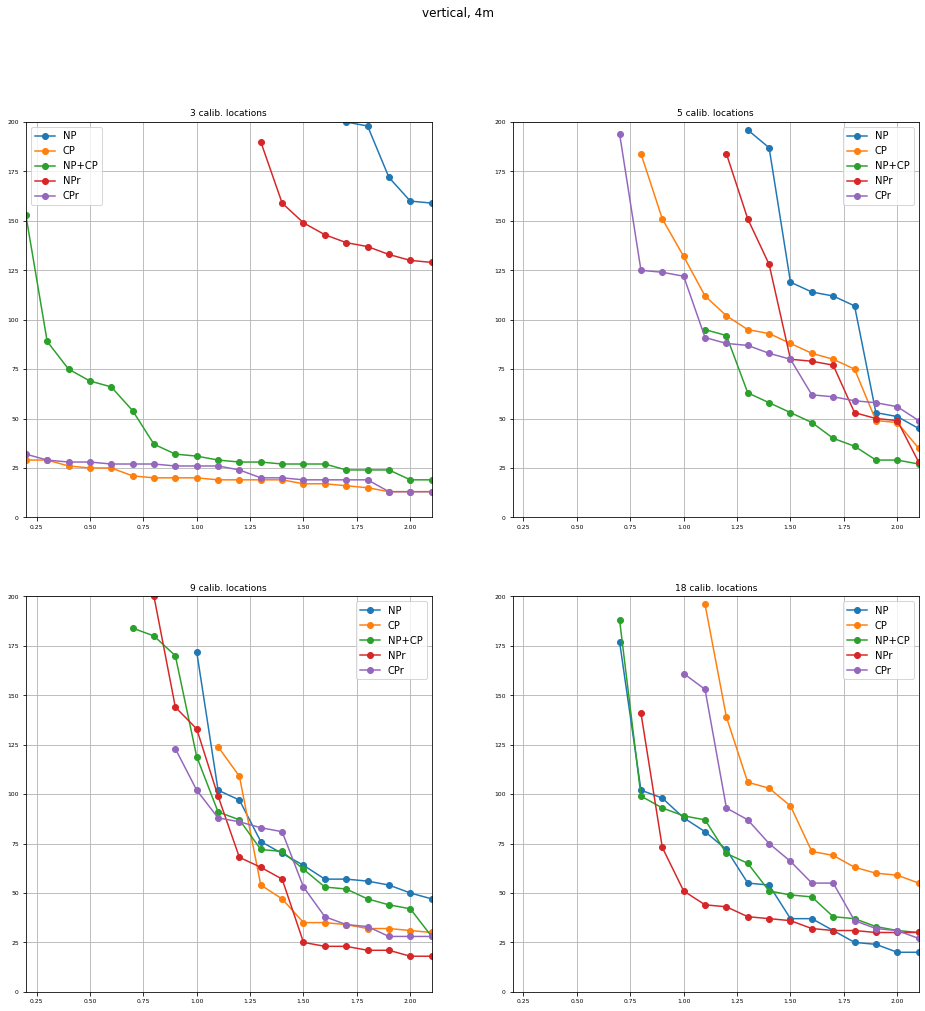

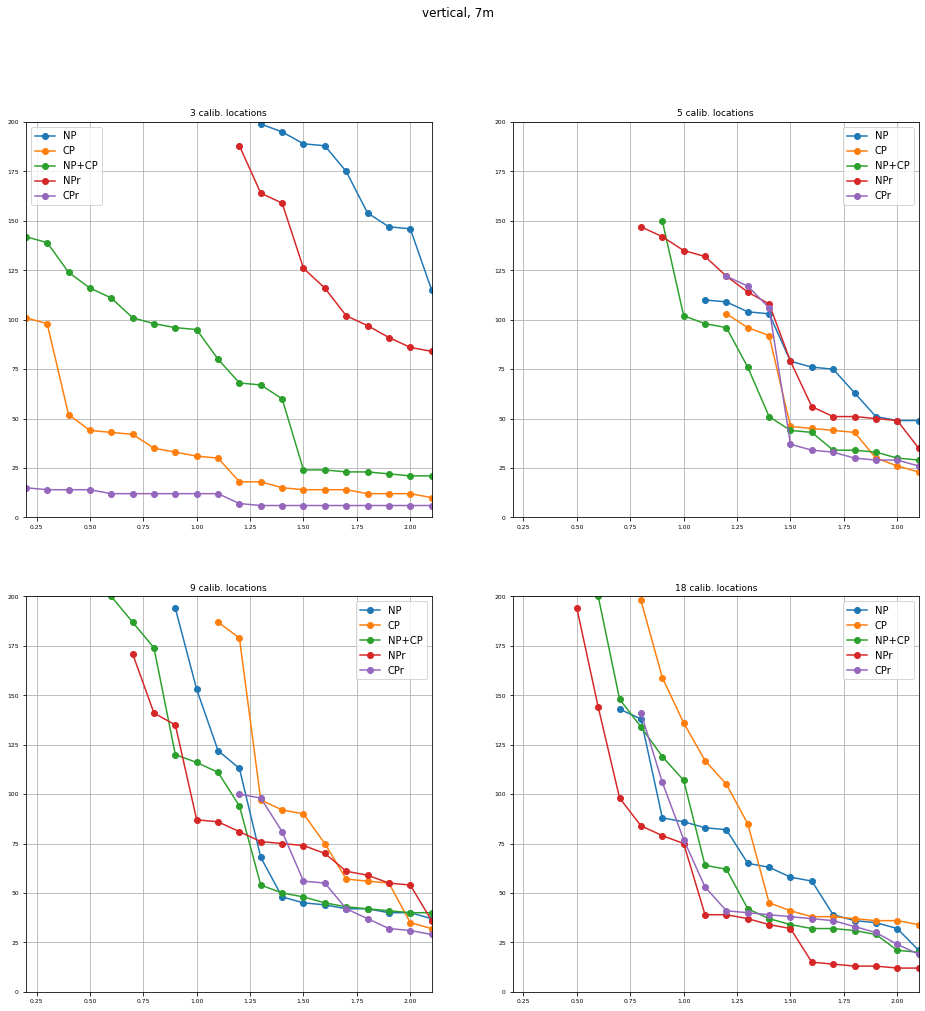

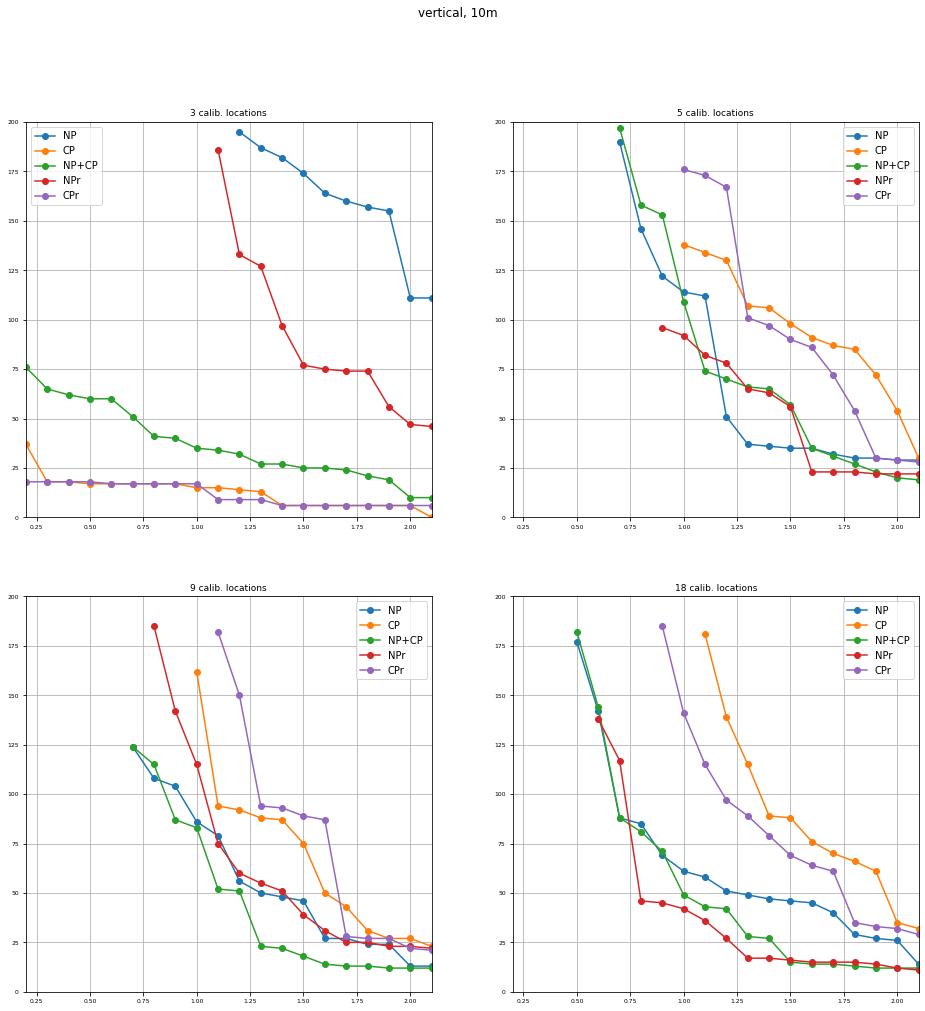

In [5]:
suf='NMG'
e=0
n=np.load(f'data/n{suf}.npy')
if suf=='NMG': ess=np.linspace(.1,2.1,21)
else: ess=np.linspace(1,6,21)
for ax in range(n.shape[5]):
    for a in range(n.shape[4]):
        fig=plt.figure(figsize=(16,16))
        tmp=['horizont','vertic'][ax]
        fig.suptitle(f'{tmp}al, {[4,7,10][a]}m')
        for h in range(n.shape[2]):
            plt.subplot(2,2,h+1)
            d=np.float32(n[:,:,h,0,a,ax,e])
            d[d==201]=np.nan
            plt.plot(ess,d,'o-')
            plt.title(f'{[3,5,9,18][h]} calib. locations')
            plt.legend(['NP','CP','NP+CP','NPr','CPr'])
            plt.grid()
            plt.xlim([.2,2.1]);plt.ylim([0,200])

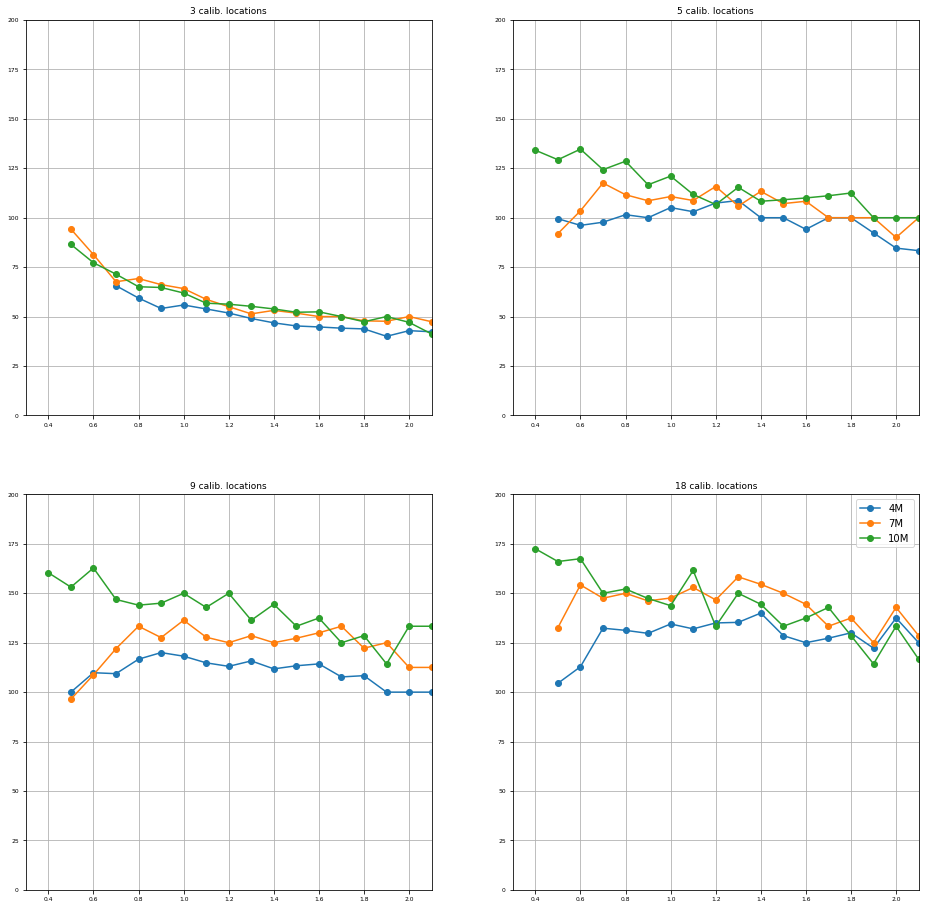

In [149]:
plt.figure(figsize=(16,16))
for h in range(n.shape[2]):
    plt.subplot(2,2,h+1)
    for a in range(n.shape[4]):
        d=(n[:,1,h,0,a]/n[:,0,h,0,a])*100
        d[n[:,0,h,0,a]==201]=np.nan;d[n[:,1,h,0,a]==201]=np.nan
        plt.plot(ess,d,'o-')
        plt.title(f'{[3,5,9,18][h]} calib. locations')
        #plt.ylabel('percent sample size needed for CP to get power of NP')
        plt.grid()
    plt.xlim([.3,2.1])
    plt.ylim([0,200])
plt.legend(['4M','7M','10M']);

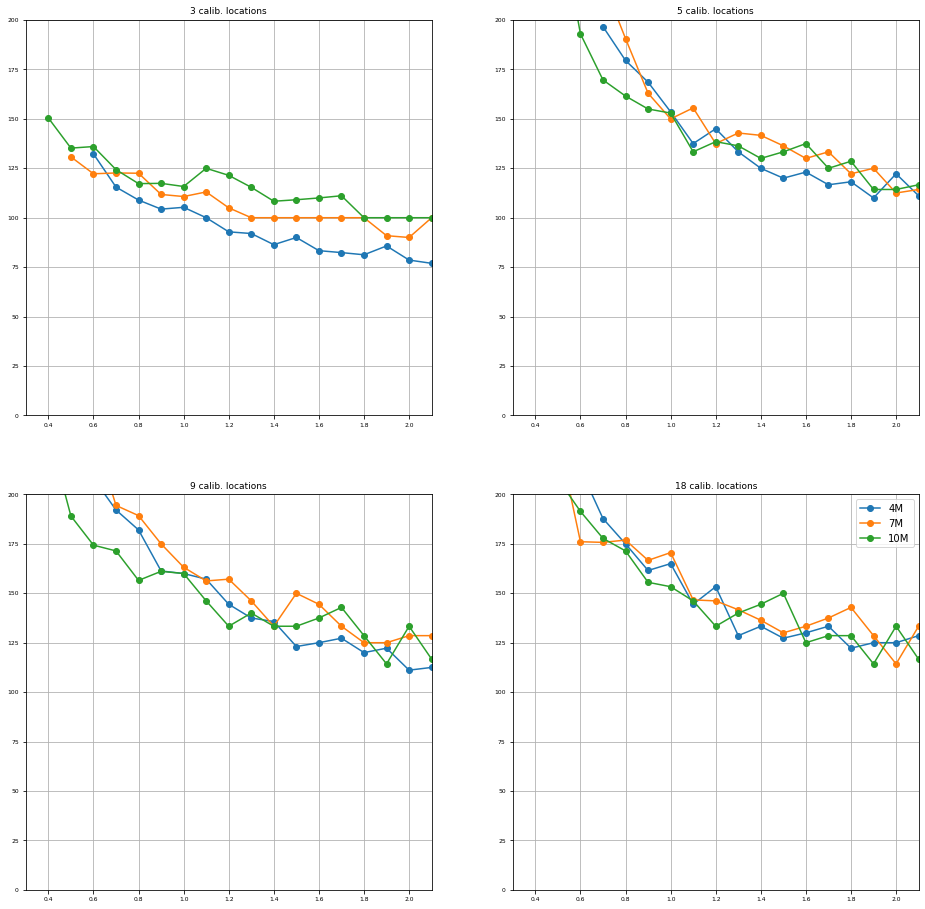

In [7]:
ax=0
plt.figure(figsize=(16,16))
for h in range(n.shape[2]):
    plt.subplot(2,2,h+1)
    for a in range(n.shape[4]):
        d=(n[:,4,h,0,a,ax]/n[:,3,h,0,a,ax])*100
        d[n[:,3,h,0,a,ax]==201]=np.nan;d[n[:,4,h,0,a,ax]==201]=np.nan
        plt.plot(ess,d,'o-')
        plt.title(f'{[3,5,9,18][h]} calib. locations')
        #plt.ylabel('percent sample size needed for CP to get power of NP')
        plt.grid()
    plt.xlim([.3,2.1])
    plt.ylim([0,200])
plt.legend(['4M','7M','10M']);

# MGsp10

0.73658
0.43553
0.34079
0.305305


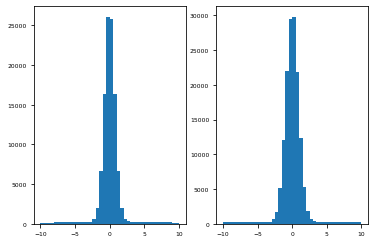

In [54]:
gz=np.load('data/gzMGsp10.npy')
for i in range(4):print(np.isnan(gz[i,:,:,0,0]).mean())
plt.subplot(1,2,1);i=1
plt.hist(gz[i,:,:,0,0][~np.isnan(gz[i,:,:,0,0])],bins=np.linspace(-10,10,41));
plt.subplot(1,2,2)
plt.hist(gz[i,:,:,1,0][~np.isnan(gz[i,:,:,1,0])],bins=np.linspace(-10,10,41));

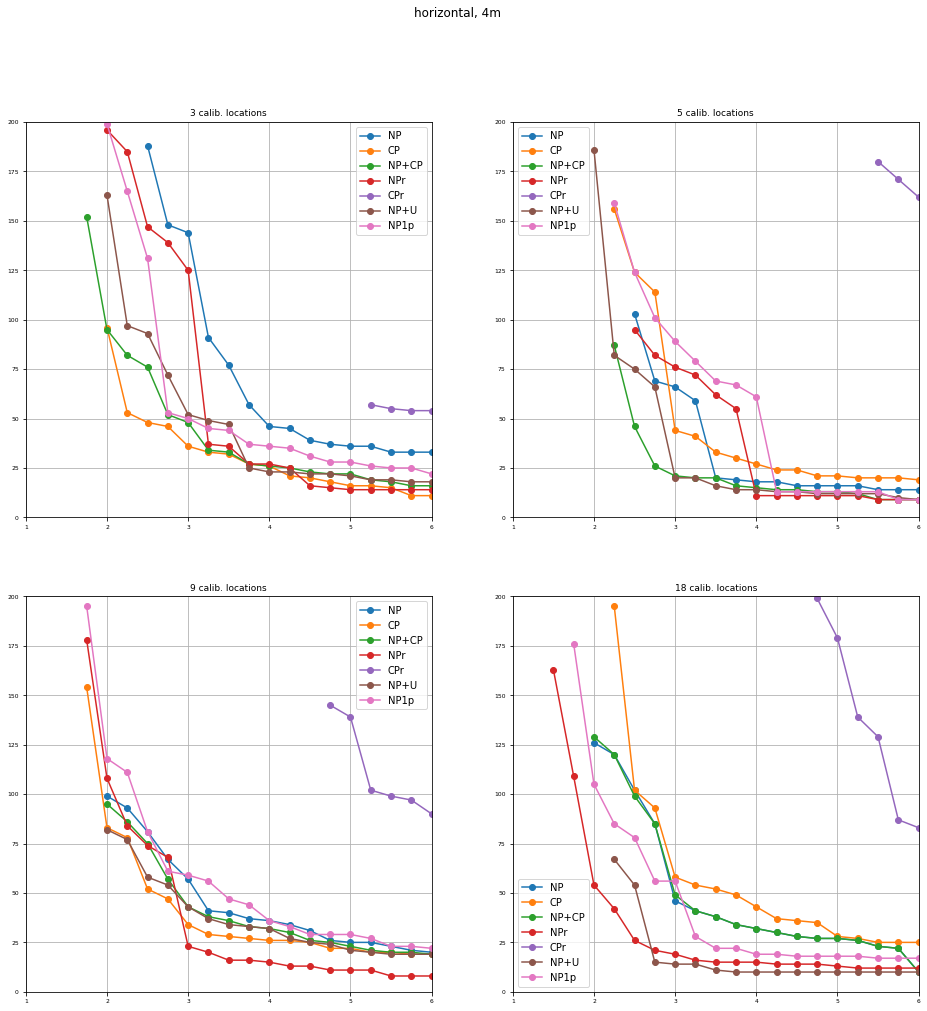

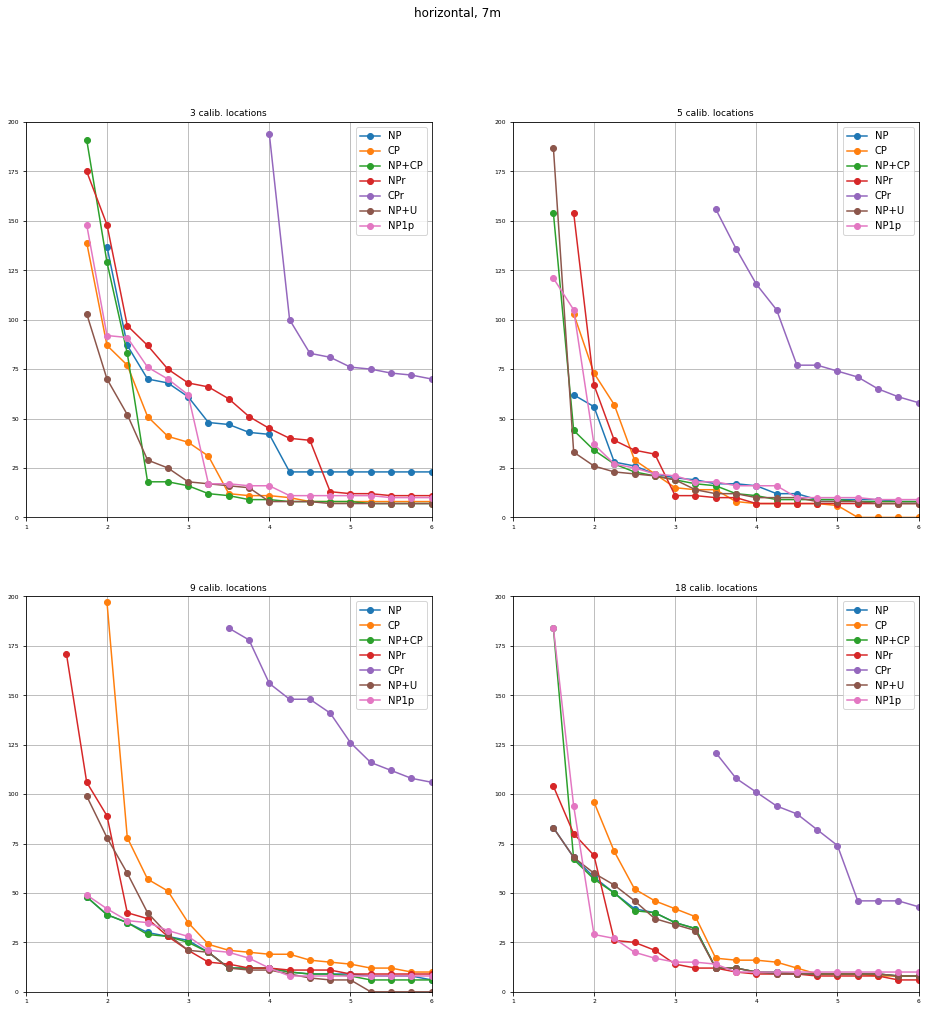

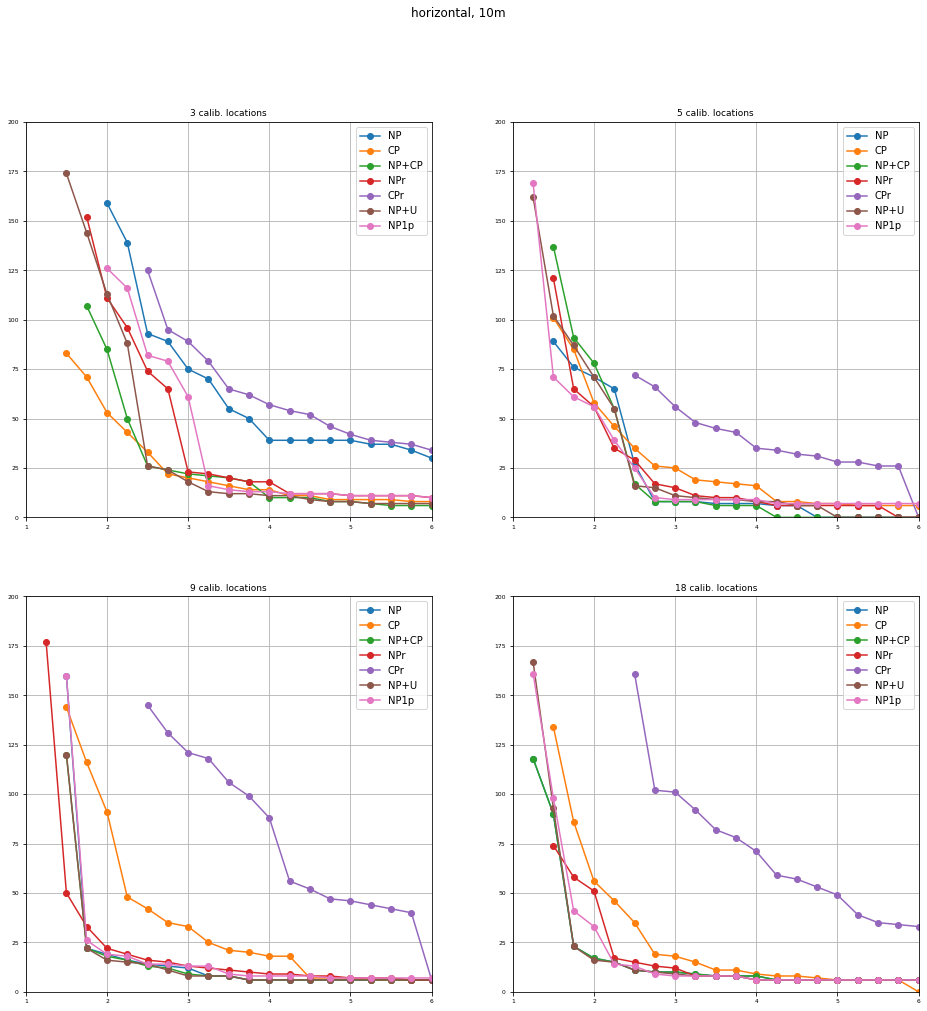

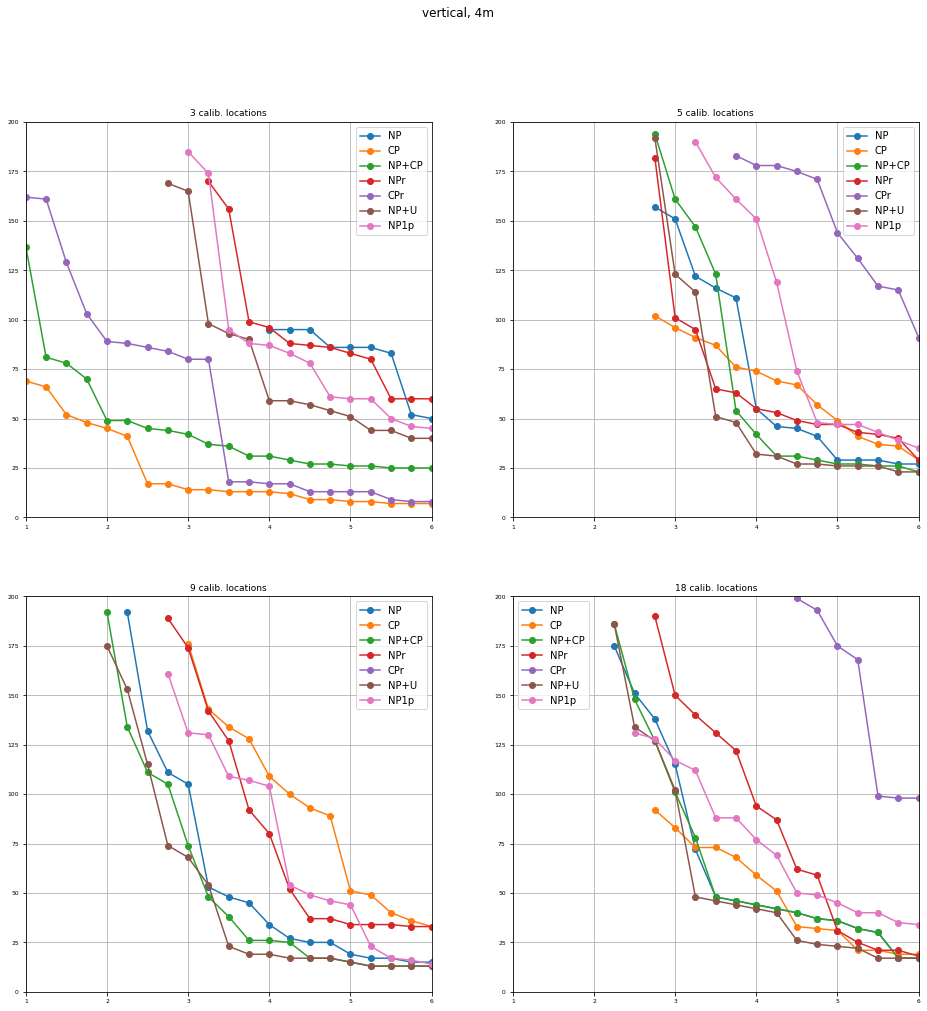

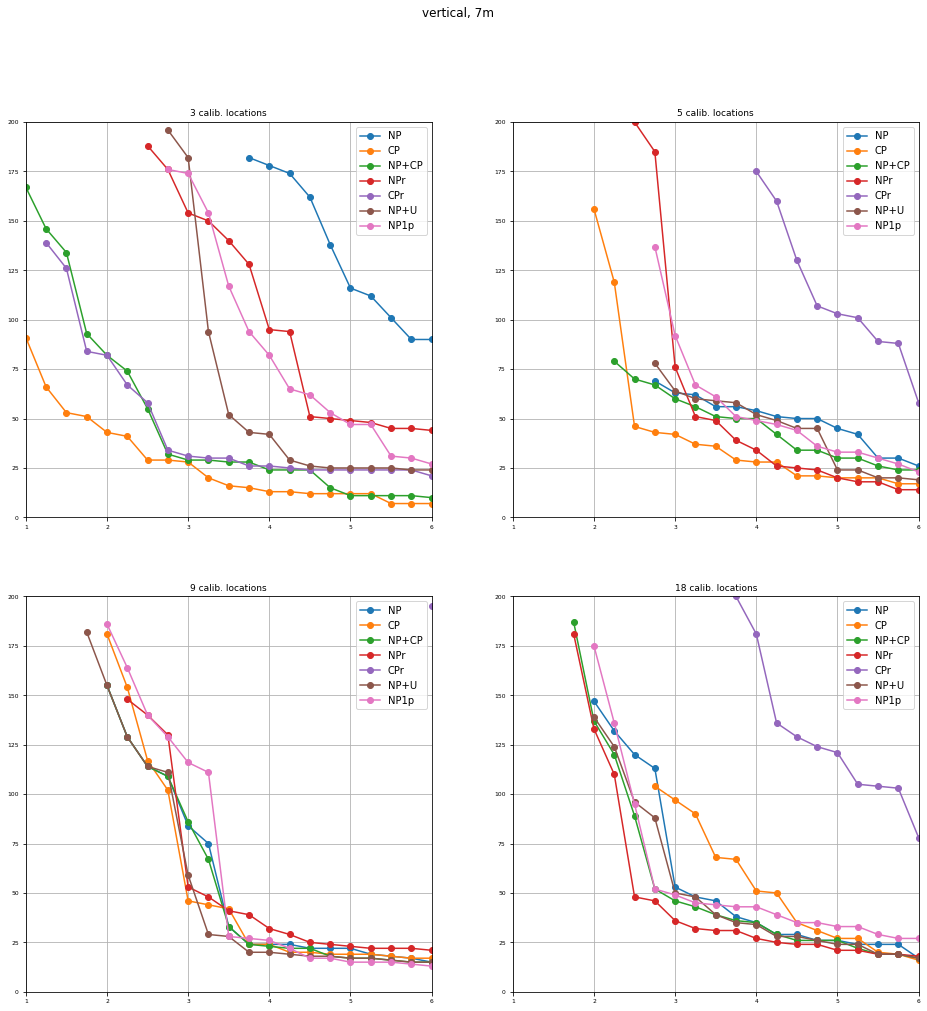

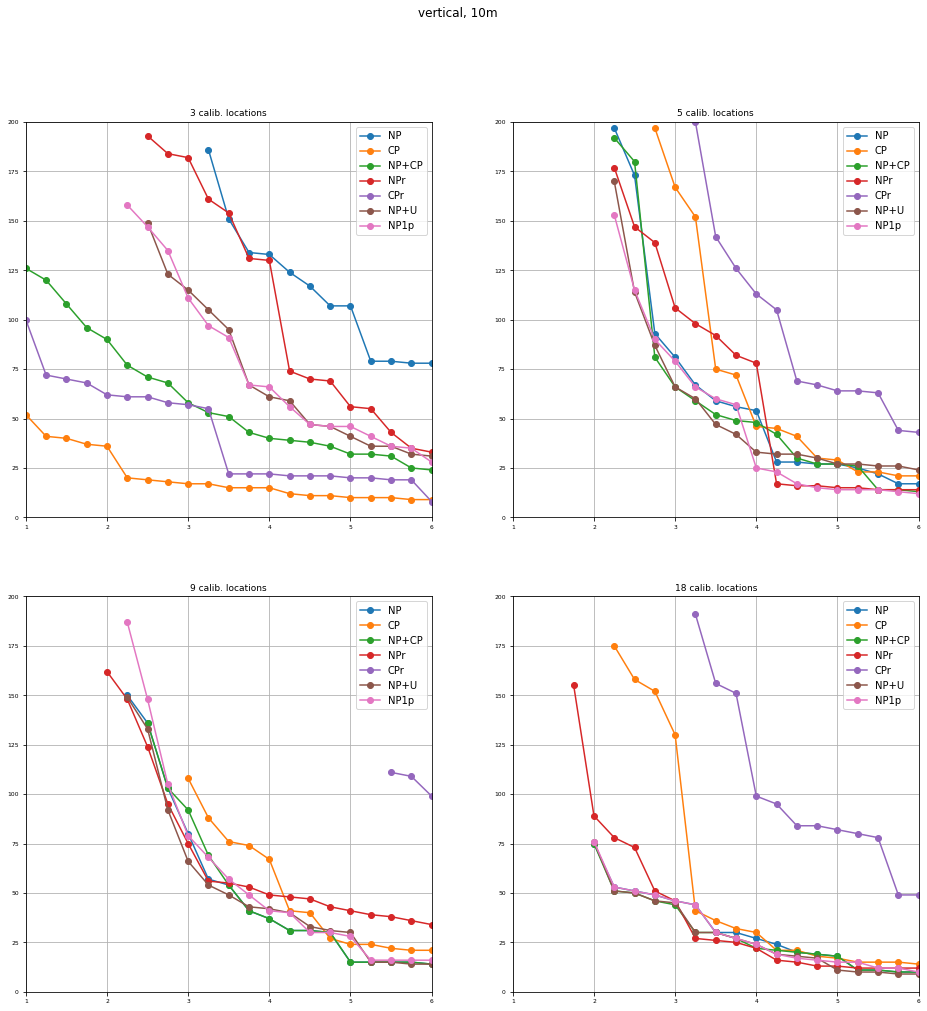

In [3]:
suf='MGsp10'
e=0
n=np.load(f'data/n{suf}.npy')
if suf=='NMG': ess=np.linspace(.1,2.1,21)
else: ess=np.linspace(1,6,21)
for ax in range(n.shape[5]):
    for a in range(n.shape[4]):
        fig=plt.figure(figsize=(16,16))
        tmp=['horizont','vertic'][ax]
        fig.suptitle(f'{tmp}al, {[4,7,10][a]}m')
        for h in range(n.shape[2]):
            plt.subplot(2,2,h+1)
            d=np.float32(n[:,:,h,0,a,ax,e])
            d[d==201]=np.nan
            plt.plot(ess,d,'o-')
            plt.title(f'{[3,5,9,18][h]} calib. locations')
            plt.legend(['NP','CP','NP+CP','NPr','CPr','NP+U','NP1p'])
            plt.grid()
            plt.xlim([ess[0],ess[-1]]);
            plt.ylim([0,200])

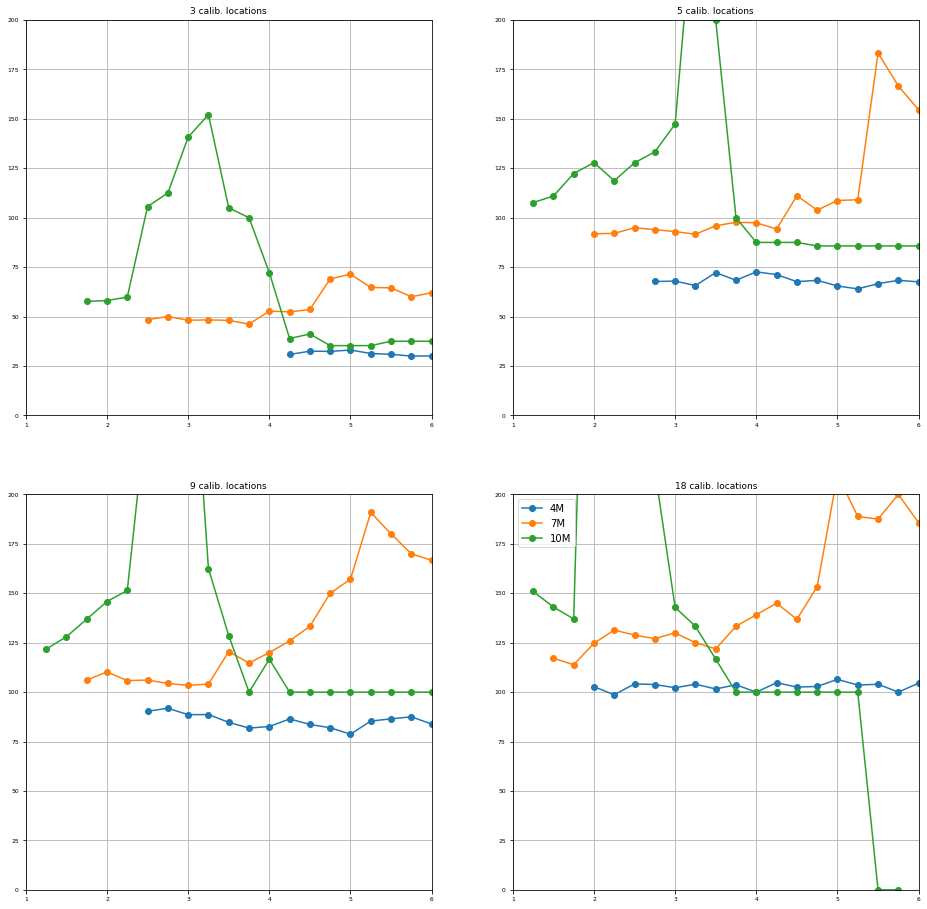

In [131]:
plt.figure(figsize=(16,16))
for h in range(n.shape[2]):
    plt.subplot(2,2,h+1)
    for a in range(n.shape[4]):
        d=(n[:,1,h,0,a]/n[:,0,h,0,a])*100
        d[n[:,0,h,0,a]==201]=np.nan;d[n[:,1,h,0,a]==201]=np.nan
        plt.plot(ess,d,'o-')
        plt.title(f'{[3,5,9,18][h]} calib. locations')
        #plt.ylabel('percent sample size needed for CP to get power of NP')
        plt.grid()
    plt.xlim([1,6])
    plt.ylim([0,200])
plt.legend(['4M','7M','10M']);

In [119]:
n.shape

(21, 3, 4, 5, 3)

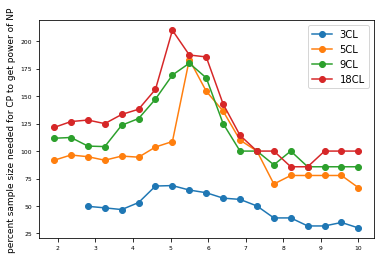

In [57]:
#plt.figure(figsize=(16,9))
for h in range(n.shape[2]):
    d=(n[:,1,h,0]/n[:,0,h,0])*100
    d[n[:,0,h,0]==201]=np.nan;d[n[:,1,h,0]==201]=np.nan
    plt.plot(ess,d,'o-')
    plt.ylabel('percent sample size needed for CP to get power of NP')
    plt.grid()
plt.legend(['3CL','5CL','9CL','18CL']);

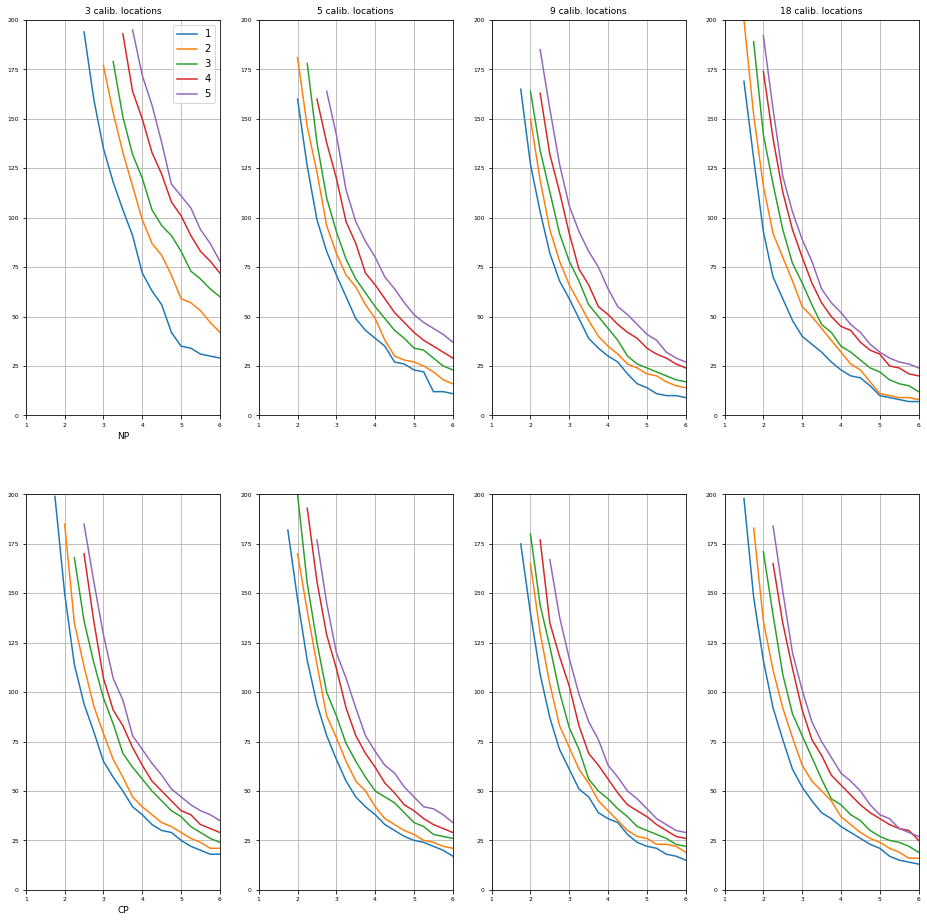

In [105]:
plt.figure(figsize=(16,16))
for h in range(n.shape[1]-1):
    for g in range(n.shape[2]):
        plt.subplot(2,4,h*4+g+1)
        d=np.float32(n[:,h,g,:])
        d[d==201]=np.nan
        plt.plot(ess,d,'-')
        if h==0: plt.title(f'{[3,5,9,18][g]} calib. locations')
        if g==0: plt.xlabel(['NP','CP'][h])
        if h==0 and g==0: plt.legend(range(1,6))
        plt.grid()
        plt.xlim([1,6]);plt.ylim([0,200])

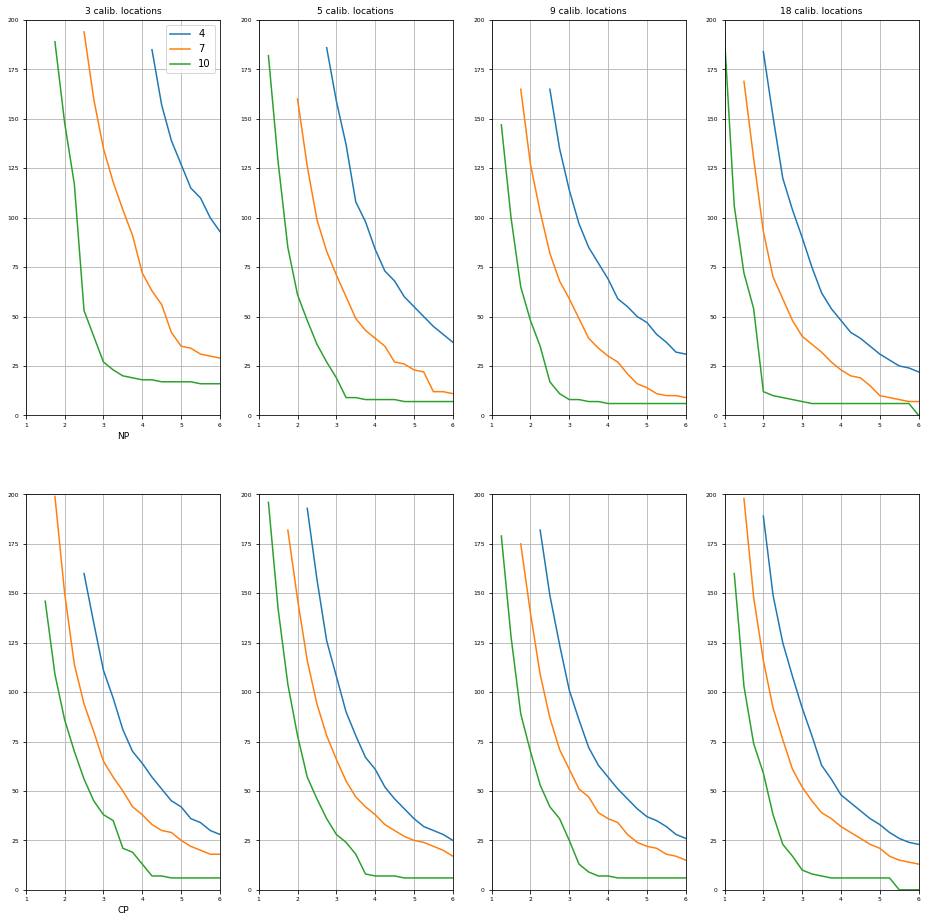

In [110]:
#MGsp10
plt.figure(figsize=(16,16))
for h in range(n.shape[1]-1):
    for g in range(n.shape[2]):
        plt.subplot(2,4,h*4+g+1)
        d=np.float32(n[:,h,g,0,:])
        d[d==201]=np.nan
        plt.plot(ess,d,'-')
        if h==0: plt.title(f'{[3,5,9,18][g]} calib. locations')
        if g==0: plt.xlabel(['NP','CP'][h])
        if h==0 and g==0: plt.legend([4,7,10])
        plt.grid()
        plt.xlim([1,6]);plt.ylim([0,200])

In [82]:
n[:,1,1,0]#CP

array([201, 201, 201, 182, 147, 116,  94,  78,  66,  55,  47,  42,  38,
        33,  30,  27,  25,  24,  22,  20,  17], dtype=int32)

In [83]:
n[:,0,1,0]#NP

array([201, 201, 201, 201, 160, 126,  99,  83,  71,  60,  49,  43,  39,
        35,  27,  26,  23,  22,  12,  12,  11], dtype=int32)

In [81]:
n[:,1,1,h]/n[:,0,1,h]

array([1.        , 1.        , 1.        , 0.90547264, 0.91875   ,
       0.92063492, 0.94949495, 0.93975904, 0.92957746, 0.91666667,
       0.95918367, 0.97674419, 0.97435897, 0.94285714, 1.11111111,
       1.03846154, 1.08695652, 1.09090909, 1.83333333, 1.66666667,
       1.54545455])

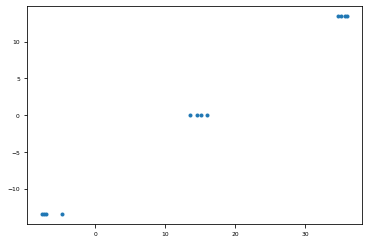

In [75]:
plt.plot(y[0,0,:18,0],c[:,0],'.')

In [189]:
from scipy.stats import norm


In [190]:
print(sm)
np.linalg.norm(Dm[:9,:,:].mean(axis=0)-Dm[9,:,:],axis=0).mean()/N**.5

1


1.0536526571653078

In [191]:
print((sm**2+sn**2)**.5)
np.linalg.norm(Dm[:9,:,:].mean(axis=(0,1))[np.newaxis,:]-Dm[9,:,:],axis=0).mean()/(N+M)**.5

2.23606797749979


2.17482297911266

In [203]:
sn=2;sm=1;
N=200;M=10;K=10000


ess=np.linspace(.1,5.1,21)
n=-np.ones((ess.size,2,4),dtype=np.int32)
def evalPower(dat,alpha=0.05,beta=.8):
    p=np.zeros(y.shape[0])*np.nan
    for i in range(y.shape[0]):
        sel=~np.isnan(dat[i,:])
        p[i]=ttest_1samp(dat[i,sel]+es/2,0,alternative='greater')[1]
    return (p<alpha).mean()>beta

for m in range(4):
    M=[4,6,10,19][m]
    Dn=norm.rvs(0,sn,size=(N,K))
    Dm=norm.rvs(Dn,sm,size=(M,N,K))
    for h in range(2):
        if h==0:d=(Dm[:(M-1),:,:].mean(axis=0)-Dm[M-1,:,:]).T
        else:d=(Dm[:(M-1),:,:].mean(axis=(0,1))-Dm[M-1,:,:]).T
        for esi,es in enumerate(ess):
            un=200;ln=5
            if not evalPower(d[:,:un]): n[esi,h,m]=201
            if evalPower(d[:,:ln]): n[esi,h,m]=0
            while n[esi,h,m]==-1:
                cn=(un+ln)//2
                if evalPower(d[:,:cn]):un=cn
                else:ln=cn
                if un == ln+1: n[esi,h,m]=un

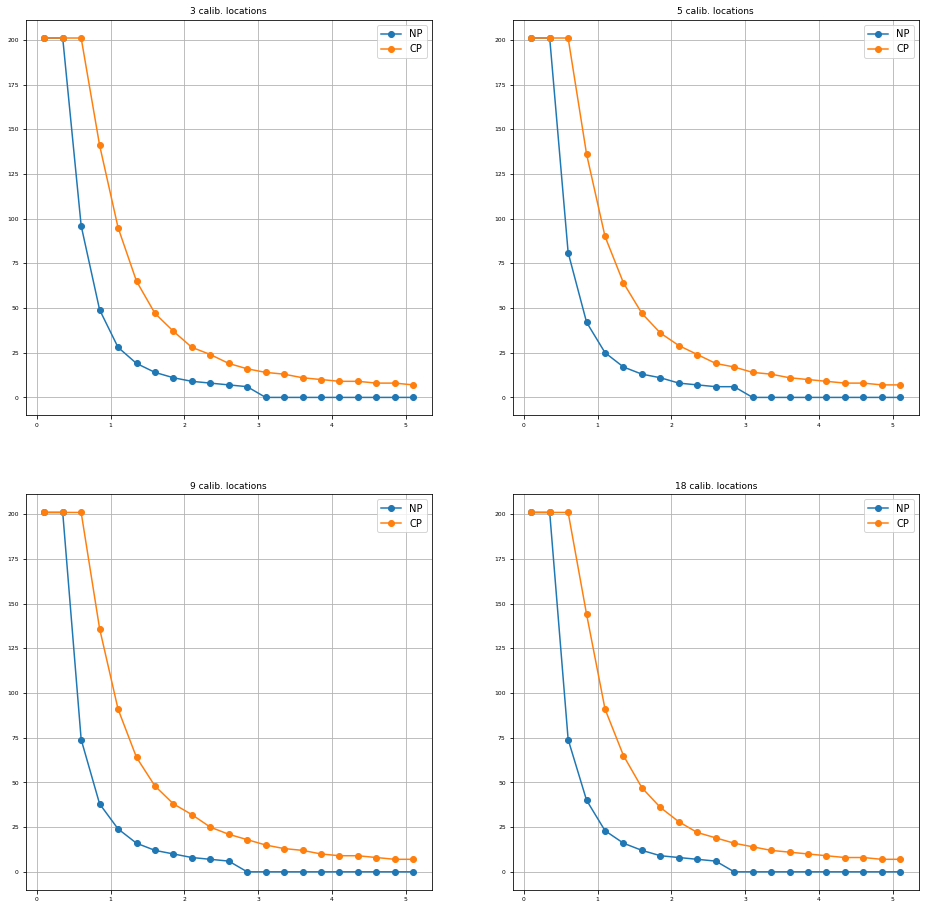

In [204]:
plt.figure(figsize=(16,16))
for h in range(n.shape[2]):
    plt.subplot(2,2,h+1)
    plt.plot(ess,n[:,:,h],'o-')
    plt.title(f'{[3,5,9,18][h]} calib. locations')
    plt.legend(['NP','CP'])
    plt.grid()

In [184]:
np.sqrt(np.sum(np.square(Dm[:9,:,:].mean(axis=0)-Dm[9,:,:]),axis=0)).mean()

14.889412126480861

In [185]:
np.(Dm[:9,:,:].mean(axis=0)-Dm[9,:,:])

0.0001113406287078478

In [9]:
L=5
y=np.rollaxis(np.load(f'data/genyLfkPref{L}.npy'),-1,0)
c=np.load(f'data/c.npy')

def selCPalgoA(c,MINVALIDCL=3,THACC=2.5,NORM=0,returnPars=False,replacement=None):
    def replace(cc,repl,el=[]):
        def _repl():
            for j in range(repl.shape[1]):
                if ~np.isnan(repl[i,0,j]):
                    cc[i,:]=repl[i,:,j]
                    repl[i,:,j]=np.nan
                    break
        if repl is None: return cc,None
        else: repl=np.copy(repl)
        if len(el)==0: 
            sel=np.isnan(cc[:,0])
            if not np.any(sel): return cc,repl
            for i in range(cc.shape[0]):
                if sel[i]: _repl()
        else:
            for i in el: _repl()
        return cc,repl
            
    if not replacement is None: assert(np.all(~np.isnan(c[:,2:4])))
    
    #print(replacement.shape,c.shape)
    tmp,replacement=replace(c[:,:2].copy(),replacement)
    cm=list(getCMsingle(tmp,c[:,2:4].copy(),normEnt=NORM))
    co=cm.copy()
    while np.isnan(co[2][:,0]).sum()<(c.shape[0]-MINVALIDCL) and (co[1]>THACC):
        ci=co.copy()
        for k in range(c.shape[0]):
            if np.isnan(co[2][k,0]): continue
            cg=co[2].copy();cg[k,:]=np.nan
            tmp,tmp2=replace(cg,replacement,el=[k])
            
            res=list(getCMsingle(tmp,c[:,2:4].copy(),normEnt=NORM))
            if res[1]<ci[1]:
                ci=res
                repli=tmp2
        if THACC==0: print(ci[1],np.int32(~np.isnan(cg[:,0])))
        if ci[1]<co[1]: 
            co=ci
            replacement=repli
            print(co[1],co[2])#,replacement[:,:,0]);
        else:
            print('replacement',replacement[:,:,0])
            break 
    if co[1]<cm[1]:cm=co
    if cm[1]>THACC or cm[0][1]<0 or cm[0][3]<0 or not np.isnan(c[:,0]).sum()<=(c.shape[0]-MINVALIDCL): 
        cm=[np.nan*np.ones(4),np.nan,np.zeros((c.shape[0],2))*np.nan]
    out = np.int32(~np.isnan(cm[2][:,0]))
    assert(out.sum()!=1)
    if returnPars: return cm
    else: return out



i=1;n=0
repl=np.rollaxis(np.reshape(np.copy(y[i,n,np.newaxis,L+5:,:]),(2,-1,2)),0,3)
print(y[i,n,:L,:])
print('repl:',repl[:,:,0])
print(repl[:,:,1])
print('res')
resNPr=selCPalgo(np.hstack([y[i,n,:L,:],c[:L,:]]),MINVALIDCL=3, THACC=1.75,returnPars=True,
    replacement=repl)
print(resNPr[2]);
selCPalgo(np.hstack([y[i,n,:L,:],c[:L,:]]),MINVALIDCL=3, THACC=1.75,returnPars=True)[2]

[[ 13.44991488  10.70251453]
 [ -5.40755025  16.6754291 ]
 [ 33.67583738  15.59064331]
 [ 32.7965005  -19.11518464]
 [ -5.79258511 -20.3152888 ]]
repl: [[ 24.7761227  -25.35945255]
 [ -5.24174862  17.77612816]
 [ 32.41108899  16.37876974]
 [         nan          nan]
 [         nan          nan]]
[[ 14.23710318 -11.73387083]
 [ -4.84698367  14.61576105]
 [ 31.54839954  17.95815749]
 [ 32.83255837 -23.0205716 ]
 [ -4.42322438 -22.69038221]]
res
3.502774699108758 [[ 13.44991488  10.70251453]
 [ -5.40755025  16.6754291 ]
 [ 32.41108899  16.37876974]
 [ 32.7965005  -19.11518464]
 [ -5.79258511 -20.3152888 ]]
3.354866632681765 [[ 13.44991488  10.70251453]
 [ -5.40755025  16.6754291 ]
 [ 31.54839954  17.95815749]
 [ 32.7965005  -19.11518464]
 [ -5.79258511 -20.3152888 ]]
3.230553198500998 [[ 13.44991488  10.70251453]
 [ -5.24174862  17.77612816]
 [ 31.54839954  17.95815749]
 [ 32.7965005  -19.11518464]
 [ -5.79258511 -20.3152888 ]]


KeyboardInterrupt: 

In [29]:
def selCPalgo(c,MINVALIDCL=3,THACC=2.5,NORM=0,returnPars=False):
    cm=list(getCMsingle(c[:,:2].copy(),c[:,2:4].copy(),normEnt=NORM))
    co=cm.copy()
    while np.isnan(co[2][:,0]).sum()<(c.shape[0]-MINVALIDCL) and (co[1]>THACC):
        ci=co.copy()
        for k in range(c.shape[0]):
            if np.isnan(co[2][k,0]): continue
            cg=co[2].copy();cg[k,:]=np.nan
            res=list(getCMsingle(cg,c[:,2:4].copy(),normEnt=NORM))
            if res[1]<ci[1]:ci=res
        if THACC==0: print(ci[1],np.int32(~np.isnan(cg[:,0])))
        if ci[1]<co[1]: co=ci
        else: break
    if co[1]<cm[1]:cm=co
    if cm[1]>THACC or cm[0][1]<0 or cm[0][3]<0 or not np.isnan(c[:,0]).sum()<=(c.shape[0]-MINVALIDCL): 
        cm=[np.nan*np.ones(4),np.nan,np.zeros((c.shape[0],2))*np.nan]
    out = np.int32(~np.isnan(cm[2][:,0]))
    assert(out.sum()!=1)
    if returnPars: return cm
    else: return out

i=2;n=4
replacement=np.rollaxis(np.reshape(np.copy(y[i,n,np.newaxis,L+5:,:]),(2,-1,2)),0,3)
print(y[i,n,:L,:])
print('repl:',repl[:,:,0])
print(repl[:,:,1])
print('res')
res=[0,np.inf,np.copy(y[i,n,:L,:])]
k=-1
while (np.any(np.isnan(res[2])) or res[1]>thacc) and k<replacement.shape[2]:
    if k>=0:
        sel=np.isnan(res[2][:,0])
        res[2][sel,:]=replacement[sel,:,k]
    print(k,res[1],res[2],res[0])
    resnew=selCPalgo(np.hstack([res[2],c[:L,:]]),MINVALIDCL=3, THACC=1.75,returnPars=True)
    if not np.all(np.isnan(resnew[2][:,0])):res=resnew
    k+=1
    print(res[2])
res

[[         nan          nan]
 [ -7.672635    11.52630913]
 [ 31.13791889  16.57447502]
 [ 32.81874022 -25.75132167]
 [ -8.6135735  -25.32543683]]
repl: [[ 24.7761227  -25.35945255]
 [ -5.24174862  17.77612816]
 [ 32.41108899  16.37876974]
 [         nan          nan]
 [         nan          nan]]
[[ 14.23710318 -11.73387083]
 [ -4.84698367  14.61576105]
 [ 31.54839954  17.95815749]
 [ 32.83255837 -23.0205716 ]
 [ -4.42322438 -22.69038221]]
res
-1 inf [[         nan          nan]
 [ -7.672635    11.52630913]
 [ 31.13791889  16.57447502]
 [ 32.81874022 -25.75132167]
 [ -8.6135735  -25.32543683]] 0
[[         nan          nan]
 [ -7.672635    11.52630913]
 [ 31.13791889  16.57447502]
 [ 32.81874022 -25.75132167]
 [ -8.6135735  -25.32543683]]
0 1.2941044572256664 [[         nan          nan]
 [ -7.672635    11.52630913]
 [ 31.13791889  16.57447502]
 [ 32.81874022 -25.75132167]
 [ -8.6135735  -25.32543683]] [-7.974632162299362, 0.6691467825115993, 3.8681074088437555, 0.673417779621959]
[[  

[[-8.225607448424135,
  0.6678246863147682,
  4.125512718282136,
  0.6720952297988293],
 1.3807129810550969,
 array([[ 13.91463015,  -7.71545548],
        [ -7.672635  ,  11.52630913],
        [ 31.13791889,  16.57447502],
        [ 32.81874022, -25.75132167],
        [ -8.6135735 , -25.32543683]])]

In [48]:
def selCPalgo(c,ctrue,MINVALIDCL=3,THACC=2.5,NORM=0,returnPars=False):
    c=np.copy(c);ctrue=np.copy(ctrue)
    cm=list(getCMsingle(c,ctrue,normEnt=NORM))
    co=cm.copy()
    while np.isnan(co[2][:,0]).sum()<(c.shape[0]-MINVALIDCL) and (co[1]>THACC):
        ci=co.copy()
        for k in range(c.shape[0]):
            if np.isnan(co[2][k,0]): continue
            cg=co[2].copy();cg[k,:]=np.nan
            res=list(getCMsingle(cg,ctrue,normEnt=NORM))
            if res[1]<ci[1]:ci=res
        if THACC==0: print(ci[1],np.int32(~np.isnan(cg[:,0])))
        if ci[1]<co[1]: co=ci
        else: break
    if co[1]<cm[1]:cm=co
    if cm[1]>THACC or cm[0][1]<0 or cm[0][3]<0 or not np.isnan(c[:,0]).sum()<=(c.shape[0]-MINVALIDCL): 
        cm=[np.nan*np.ones(4),np.nan,np.zeros((c.shape[0],2))*np.nan]
    out = np.int32(~np.isnan(cm[2][:,0]))
    assert(out.sum()!=1)
    if returnPars: return cm
    else: return out

def selCPalgoRepl(c,ctrue,replacement,MINVALIDCL=3,THACC=2.5,NORM=0,returnPars=False):
    res=[0,np.inf,c]
    k=-1
    while (np.any(np.isnan(res[2])) or res[1]>thacc) and k<replacement.shape[2]:
        if k>=0:
            sel=np.isnan(res[2][:,0])
            res[2][sel,:]=replacement[sel,:,k]
        #print(k,res[1],res[2],res[0])
        resnew=selCPalgo(res[2],ctrue,MINVALIDCL=MINVALIDCL,THACC=THACC,NORM=NORM,returnPars=True)
        if not np.all(np.isnan(resnew[2][:,0])):res=resnew
        k+=1
        #print(res[0])
    if returnPars:return res
    else: return np.int32(~np.isnan(res[2][:,0]))

selCPalgoRepl(np.copy(y[i,n,:L,:]),c[:L,:],rpl,MINVALIDCL=3, THACC=1.75,returnPars=True)

[[-9.928441539902941,
  0.6813503700791393,
  3.1883403389414333,
  0.6437515142094036],
 1.2410323576428177,
 array([[ 14.2162134 ,  -4.3549007 ],
        [ -4.88508035,  17.32237296],
        [ 34.48231101,  13.78681936],
        [ 34.28102028, -28.14904468],
        [ -5.23590305, -23.36899715]])]

In [58]:
def selCPalgo(c,ctrue,replacement=None,MINVALIDCL=3,THACC=2.5,NORM=0,returnPars=False):
    def _selCPalgo(c,ctrue):
        c=np.copy(c);ctrue=np.copy(ctrue)
        cm=list(getCMsingle(c,ctrue,normEnt=NORM))
        co=cm.copy()
        while np.isnan(co[2][:,0]).sum()<(c.shape[0]-MINVALIDCL) and (co[1]>THACC):
            ci=co.copy()
            for k in range(c.shape[0]):
                if np.isnan(co[2][k,0]): continue
                cg=co[2].copy();cg[k,:]=np.nan
                res=list(getCMsingle(cg,ctrue,normEnt=NORM))
                if res[1]<ci[1]:ci=res
            if THACC==0: print(ci[1],np.int32(~np.isnan(cg[:,0])))
            if ci[1]<co[1]: co=ci
            else: break
        if co[1]<cm[1]:cm=co
        if cm[1]>THACC or cm[0][1]<0 or cm[0][3]<0 or not np.isnan(c[:,0]).sum()<=(c.shape[0]-MINVALIDCL): 
            cm=[np.nan*np.ones(4),np.nan,np.zeros((c.shape[0],2))*np.nan]
        out = np.int32(~np.isnan(cm[2][:,0]))
        assert(out.sum()!=1)
        if returnPars: return cm
        else: return out
    if replacement is None: return _selCPalgo(c,ctrue)
    res=[None,np.inf,c]
    k=-1
    while (np.any(np.isnan(res[2])) or res[1]>THACC) and k<replacement.shape[2]:
        if k>=0:
            sel=np.isnan(res[2][:,0])
            res[2][sel,:]=replacement[sel,:,k]
        resnew=_selCPalgo(res[2],ctrue)
        print('r',resnew)
        if not np.all(np.isnan(resnew[2][:,0])):res=resnew
        k+=1
    if res[0] is None: res=[np.nan*np.ones(4),np.nan,np.zeros((c.shape[0],2))*np.nan]
    if returnPars:return res
    else: return np.int32(~np.isnan(res[2][:,0]))

L=3
y=np.rollaxis(np.load(f'data/genyLfkPref{L}.npy'),-1,0)
i=0;n=2;r=1
rpl=np.rollaxis(np.reshape(np.copy(y[i,n,np.newaxis,L+5:,:]),(2,-1,2)),0,3)
resNP=selCPalgo(y[i,n,:L,:],c[:L,:],MINVALIDCL=3, THACC=1.75,returnPars=True,replacement=[None,rpl][r])
resNP

r [array([nan, nan, nan, nan]), nan, array([[nan, nan],
       [nan, nan],
       [nan, nan]])]
r [array([nan, nan, nan, nan]), nan, array([[nan, nan],
       [nan, nan],
       [nan, nan]])]
r [array([nan, nan, nan, nan]), nan, array([[nan, nan],
       [nan, nan],
       [nan, nan]])]


[array([nan, nan, nan, nan]),
 nan,
 array([[nan, nan],
        [nan, nan],
        [nan, nan]])]